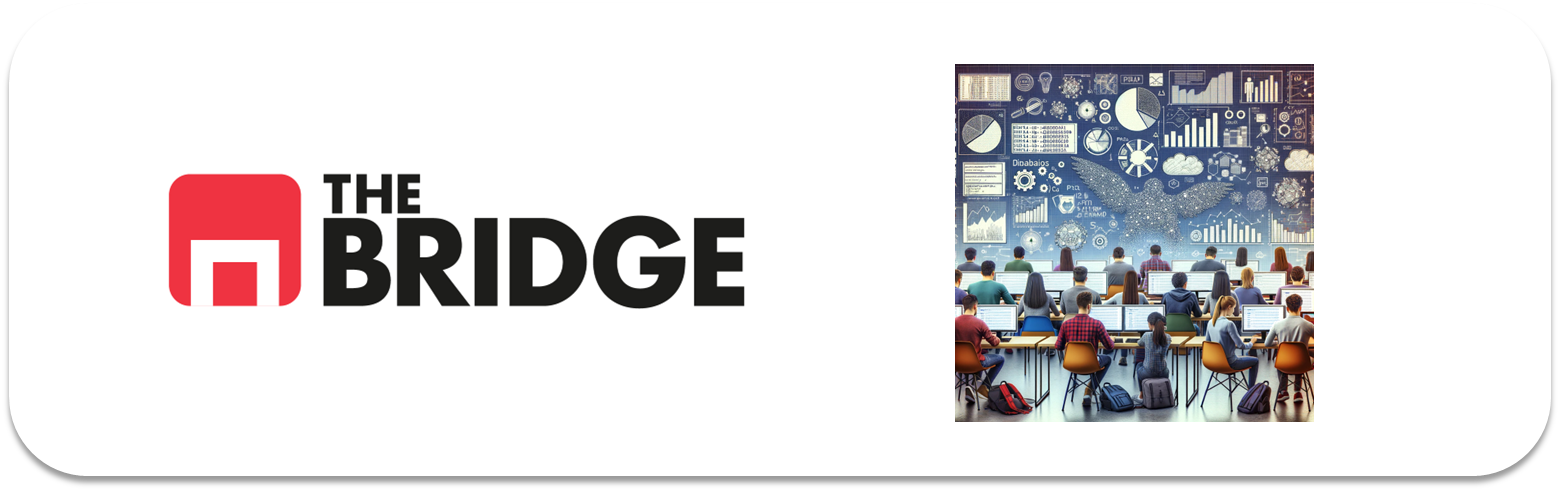

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler




1. Carga el dataset del Titanic. 
 

In [77]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [78]:
df_titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
 

In [79]:
df_titanic.drop(columns=["embarked","pclass"],inplace=True)
#df_titanic.dropna(inplace=True)




In [80]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   deck         203 non-null    object 
 10  embark_town  889 non-null    object 
 11  alive        891 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 78.4+ KB


In [81]:
df_titanic.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
for column in df_titanic.columns:
    if df_titanic[column].dtype == 'object':
        print("column:",column,"-->",df_titanic[column].unique())
        print("column:",column,"-->",df_titanic[column].value_counts())



column: sex --> ['male' 'female']
column: sex --> sex
male      577
female    314
Name: count, dtype: int64
column: class --> ['Third' 'First' 'Second']
column: class --> class
Third     491
First     216
Second    184
Name: count, dtype: int64
column: who --> ['man' 'woman' 'child']
column: who --> who
man      537
woman    271
child     83
Name: count, dtype: int64
column: deck --> [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
column: deck --> deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
column: embark_town --> ['Southampton' 'Cherbourg' 'Queenstown' nan]
column: embark_town --> embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
column: alive --> ['no' 'yes']
column: alive --> alive
no     549
yes    342
Name: count, dtype: int64


<Axes: xlabel='survived', ylabel='count'>

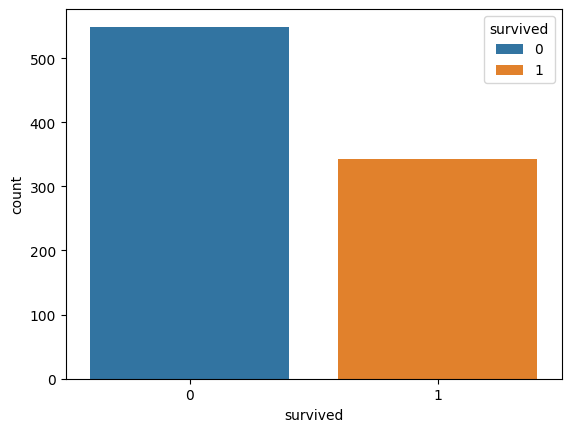

In [83]:
sns.countplot(x= "survived", data = df_titanic, hue = "survived")

3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.


In [84]:
df_titanic["survived"].value_counts(normalize = True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

La proporción es casi 61-38, no está balanceado

In [85]:
#col_str = ['sex', 'embarked', 'class', 'who', 'embark_town']
col_str = df_titanic.select_dtypes(include = "object").columns.to_list()
df_titanic = pd.get_dummies(df_titanic, columns = [col for col in col_str if col != "survived" and col  != "alive" and col != "deck"], dtype= "int") 



In [86]:
df_titanic

,survived,age,sibsp,parch,fare,adult_male,deck,alive,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,True,NaN,no,False,0,1,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,False,C,yes,False,1,0,1,0,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,False,NaN,yes,True,1,0,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,C,yes,False,1,0,1,0,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,True,NaN,no,True,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,True,NaN,no,True,0,1,0,1,0,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,False,B,yes,True,1,0,1,0,0,0,0,1,0,0,1
888,0,NaN,1,2,23.4500,False,NaN,no,False,1,0,0,0,1,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,True,C,yes,True,0,1,1,0,0,0,1,0,1,0,0


In [87]:
df_titanic["alone_int"]=0
df_titanic["adult_male_int"]=0
df_titanic.loc[df_titanic["alone"],"alone_int"]=1
df_titanic.loc[df_titanic["adult_male"],"adult_male_int"]=1
df_titanic[["alone","alone_int","adult_male","adult_male_int"]]

,alone,alone_int,adult_male,adult_male_int
0,False,0,True,1
1,False,0,False,0
2,True,1,False,0
3,False,0,False,0
4,True,1,True,1
...,...,...,...,...
886,True,1,True,1
887,True,1,False,0
888,False,0,False,0
889,True,1,True,1


In [88]:

df_titanic.drop(columns=["alone","adult_male","alive"], inplace=True)

In [89]:
df_titanic

,survived,age,sibsp,parch,fare,deck,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_int,adult_male_int
0,0,22.0,1,0,7.2500,NaN,0,1,0,0,1,0,1,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,1,1,0,0,0,0
2,1,26.0,0,0,7.9250,NaN,1,0,0,0,1,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C,1,0,1,0,0,0,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,NaN,0,1,0,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,0,1,0,1,0,0,1,0,0,0,1,1,1
887,1,19.0,0,0,30.0000,B,1,0,1,0,0,0,0,1,0,0,1,1,0
888,0,NaN,1,2,23.4500,NaN,1,0,0,0,1,0,0,1,0,0,1,0,0
889,1,26.0,0,0,30.0000,C,0,1,1,0,0,0,1,0,1,0,0,1,1


In [90]:
df_titanic.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'deck', 'sex_female',
       'sex_male', 'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alone_int',
       'adult_male_int'],
      dtype='object')

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.


5. Construye las parejas X,y de train y test.


In [91]:
train_set, test_set = train_test_split(df_titanic, test_size= 0.2, random_state= 42)

X_train = train_set.drop("survived", axis = 1)
X_test = test_set.drop("survived", axis = 1)
y_train = train_set["survived"]
y_test = test_set["survived"]

In [92]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[['embark_town_Cherbourg', 'embark_town_Queenstown','embark_town_Southampton']]), columns=['embark_town_Cherbourg', 'embark_town_Queenstown','embark_town_Southampton'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test[['embark_town_Cherbourg', 'embark_town_Queenstown','embark_town_Southampton']]), columns= ['embark_town_Cherbourg', 'embark_town_Queenstown','embark_town_Southampton'])


In [93]:
X_train_scaled.describe()

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,-4.490790e-17,1.871162e-18,-9.979533e-17
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-4.614620e-01,-3.033555e-01,-1.675556e+00
25%,-4.614620e-01,-3.033555e-01,-1.675556e+00
50%,-4.614620e-01,-3.033555e-01,5.968170e-01
75%,-4.614620e-01,-3.033555e-01,5.968170e-01
max,2.167026e+00,3.296463e+00,5.968170e-01


In [94]:
X_test_scaled.describe()

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,179.000000,179.000000,179.000000
mean,0.169962,0.038527,-0.164872
std,1.126090,1.058342,1.075702
min,-0.461462,-0.303355,-1.675556
25%,-0.461462,-0.303355,-1.675556
50%,-0.461462,-0.303355,0.596817
75%,-0.461462,-0.303355,0.596817
max,2.167026,3.296463,0.596817


6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.


In [95]:
mean_age_X_train = X_train['age'].mean()
X_train['age'] = X_train['age'].fillna(mean_age_X_train)
mode_deck = X_train['deck'].mode()
X_train['deck'] = X_train['deck'].fillna(mode_deck[0])

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      712 non-null    float64
 1   sibsp                    712 non-null    int64  
 2   parch                    712 non-null    int64  
 3   fare                     712 non-null    float64
 4   deck                     712 non-null    object 
 5   sex_female               712 non-null    int32  
 6   sex_male                 712 non-null    int32  
 7   class_First              712 non-null    int32  
 8   class_Second             712 non-null    int32  
 9   class_Third              712 non-null    int32  
 10  who_child                712 non-null    int32  
 11  who_man                  712 non-null    int32  
 12  who_woman                712 non-null    int32  
 13  embark_town_Cherbourg    712 non-null    int32  
 14  embark_town_Queenstown   712 

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


In [97]:
corr = train_set.corr(numeric_only= True)
corr

,survived,age,sibsp,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_int,adult_male_int
survived,1.000000,-0.059695,-0.047602,0.078311,0.246641,0.541750,-0.541750,0.259753,0.114623,-0.314174,0.127665,-0.555530,0.511542,0.159632,-0.006097,-0.142371,-0.180542,-0.555530
age,-0.059695,1.000000,-0.320916,-0.207040,0.088103,-0.091598,0.091598,0.334446,0.013626,-0.301390,-0.600814,0.296376,0.107244,0.000653,-0.040144,0.006187,0.209044,0.296376
sibsp,-0.047602,-0.320916,1.000000,0.440355,0.153011,0.104174,-0.104174,-0.054596,-0.063010,0.098075,0.358688,-0.254505,0.039869,-0.079046,-0.009471,0.077320,-0.579563,-0.254505
parch,0.078311,-0.207040,0.440355,1.000000,0.222180,0.250724,-0.250724,-0.016107,0.007551,0.007412,0.371074,-0.355524,0.139905,-0.015874,-0.100675,0.080333,-0.590175,-0.355524
fare,0.246641,0.088103,0.153011,0.222180,1.000000,0.171665,-0.171665,0.594565,-0.119983,-0.404338,0.006792,-0.167475,0.174748,0.250671,-0.108185,-0.154245,-0.257614,-0.167475
sex_female,0.541750,-0.091598,0.104174,0.250724,0.171665,1.000000,-1.000000,0.097889,0.058152,-0.130711,0.102501,-0.899679,0.895979,0.069839,0.046336,-0.098439,-0.275592,-0.899679
sex_male,-0.541750,0.091598,-0.104174,-0.250724,-0.171665,-1.000000,1.000000,-0.097889,-0.058152,0.130711,-0.102501,0.899679,-0.895979,-0.069839,-0.046336,0.098439,0.275592,0.899679
class_First,0.259753,0.334446,-0.054596,-0.016107,0.594565,0.097889,-0.097889,1.000000,-0.282693,-0.613457,-0.121996,-0.054056,0.136858,0.249397,-0.141227,-0.138173,-0.110743,-0.054056
class_Second,0.114623,0.013626,-0.063010,0.007551,-0.119983,0.058152,-0.058152,-0.282693,1.000000,-0.584095,0.015871,-0.060617,0.054560,-0.094914,-0.120278,0.161292,-0.041997,-0.060617
class_Third,-0.314174,-0.301390,0.098075,0.007412,-0.404338,-0.130711,0.130711,-0.613457,-0.584095,1.000000,0.090166,0.095649,-0.160729,-0.132896,0.218533,-0.015871,0.128287,0.095649


In [98]:
train_set.head(10)

,survived,age,sibsp,parch,fare,deck,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_int,adult_male_int
331,0,45.5,0,0,28.5000,C,0,1,1,0,0,0,1,0,0,0,1,1,1
733,0,23.0,0,0,13.0000,NaN,0,1,0,1,0,0,1,0,0,0,1,1,1
382,0,32.0,0,0,7.9250,NaN,0,1,0,0,1,0,1,0,0,0,1,1,1
704,0,26.0,1,0,7.8542,NaN,0,1,0,0,1,0,1,0,0,0,1,0,1
813,0,6.0,4,2,31.2750,NaN,1,0,0,0,1,1,0,0,0,0,1,0,0
118,0,24.0,0,1,247.5208,B,0,1,1,0,0,0,1,0,1,0,0,0,1
536,0,45.0,0,0,26.5500,B,0,1,1,0,0,0,1,0,0,0,1,1,1
361,0,29.0,1,0,27.7208,NaN,0,1,0,1,0,0,1,0,1,0,0,0,1
29,0,NaN,0,0,7.8958,NaN,0,1,0,0,1,0,1,0,0,0,1,1,1
55,1,NaN,0,0,35.5000,C,0,1,1,0,0,0,1,0,0,0,1,1,1


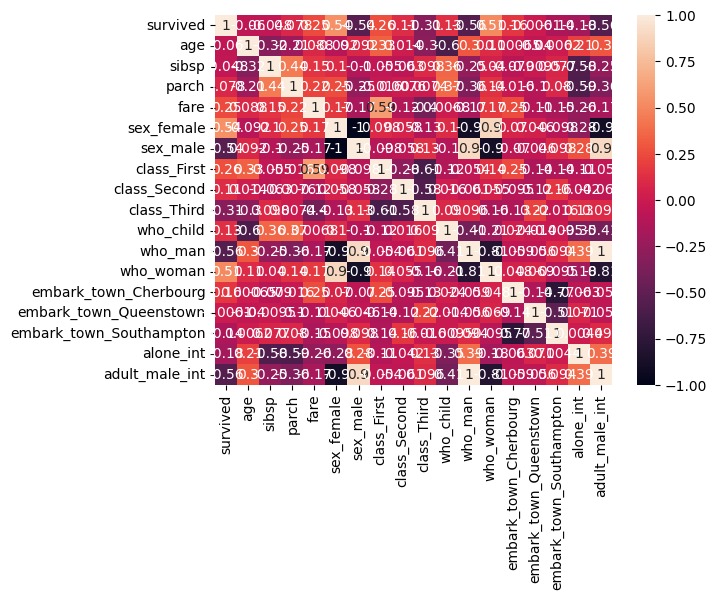

<Figure size 120000x120000 with 0 Axes>

In [99]:
sns.heatmap(train_set.corr(numeric_only = True),annot=True);
plt.figure(figsize=(100, 100), dpi=1200)
plt.show();


8. Trata las variables para que funcionen lo mejor posible en el modelo.


In [100]:
df_titanic.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [101]:
categories = [[
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
]]

In [102]:
coder = OrdinalEncoder(categories= categories)
X_train["deck"] = coder.fit_transform(X_train[["deck"]],coder)

In [103]:
X_train[["deck","fare"]].sort_values(by=["fare"])

,deck,fare
271,2.0,0.0000
674,2.0,0.0000
302,2.0,0.0000
466,2.0,0.0000
179,2.0,0.0000
...,...,...
341,2.0,263.0000
438,2.0,263.0000
679,1.0,512.3292
737,1.0,512.3292


In [104]:
X_train_scaled


,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,-0.461462,-0.303355,0.596817
1,-0.461462,-0.303355,0.596817
2,-0.461462,-0.303355,0.596817
3,-0.461462,-0.303355,0.596817
4,-0.461462,-0.303355,0.596817
...,...,...,...
707,-0.461462,-0.303355,0.596817
708,-0.461462,-0.303355,0.596817
709,-0.461462,-0.303355,0.596817
710,-0.461462,-0.303355,0.596817


In [105]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

9. Construye un modelo de regresión logística.


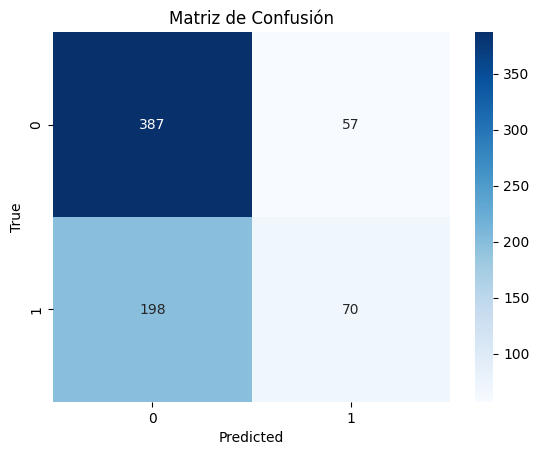

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       444
           1       0.55      0.26      0.35       268

    accuracy                           0.64       712
   macro avg       0.61      0.57      0.55       712
weighted avg       0.62      0.64      0.60       712



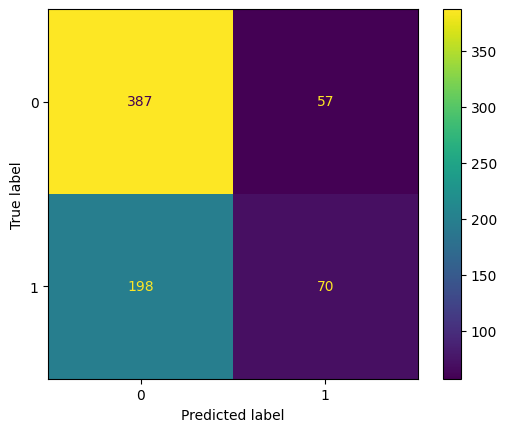

In [106]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
pred_train = model.predict(X_train_scaled)
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
report = classification_report(y_train, pred_train)
print(report)
ConfusionMatrixDisplay.from_predictions(y_train,pred_train)


10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


In [107]:
model.coef_

array([[-0.30010413, -0.41867807, -0.72647226]])

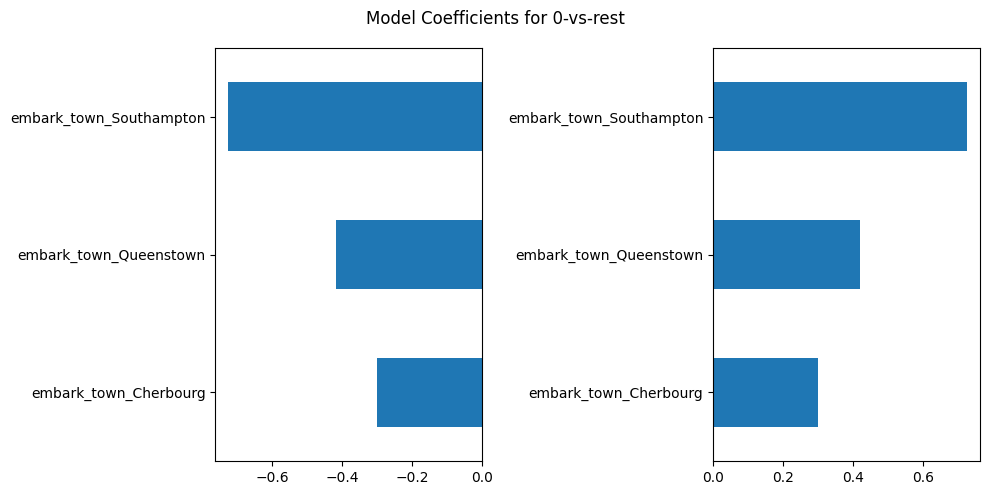

In [108]:
def show_coefs(model, figsize=(10, 5), model_index = 0): # Metemos el índice para indicar que modelo pintar
    df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

    fig.tight_layout()

    return df_coef

for model_index in range(1): # Para cada modelo aplicamos la función
    show_coefs(model, model_index = model_index)

[                            coefs
 embark_town_Cherbourg   -0.300104
 embark_town_Queenstown  -0.418678
 embark_town_Southampton -0.726472]

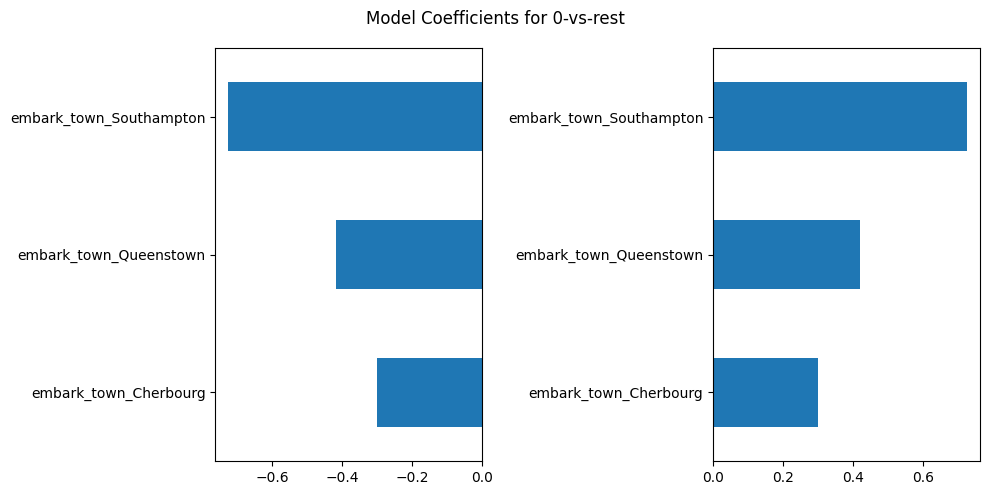

In [109]:
def show_coefs(model, figsize=(10, 5)): 
    number_of_submodels = model.coef_.shape[0] # Obtenemos el número de submodelos, ya que coef_ devuelve un array de dimensión 2 (ndim de numpy ojo) y la cardinalidad de la primera da el numero de modelos o sea el número de clases
    # number_of_submodels = len(model.classes_), sería una opción alternativa.
    list_of_dfs = []
    for model_index in range(number_of_submodels):
        df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
        fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

        fig.tight_layout()
        list_of_dfs.append(df_coef.copy())

    return list_of_dfs

show_coefs(model)

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 


In [110]:
mean_age_X_test = X_test['age'].mean()
X_test['age'] = X_test['age'].fillna(mean_age_X_test)
mode_deck_X_test = X_test['deck'].mode()
X_test['deck'] = X_test['deck'].fillna(mode_deck_X_test[0])

In [111]:
coder = OrdinalEncoder(categories= categories)
X_test["deck"] = coder.fit_transform(X_test[["deck"]],coder)

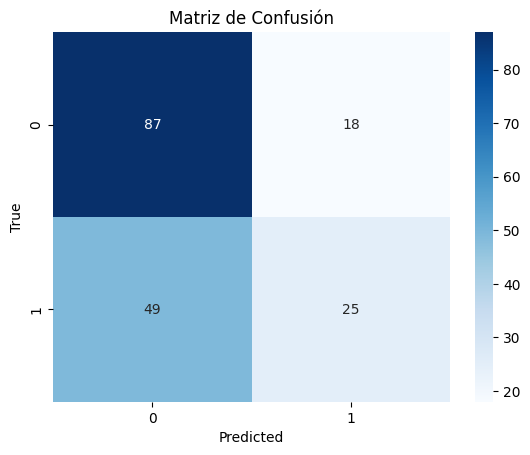

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       105
           1       0.58      0.34      0.43        74

    accuracy                           0.63       179
   macro avg       0.61      0.58      0.57       179
weighted avg       0.62      0.63      0.60       179



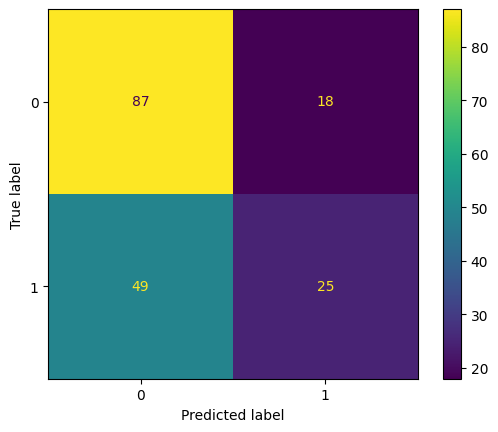

In [114]:
pred_test = model.predict(X_test_scaled)
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_test)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
report = classification_report(y_test, pred_test)
print(report)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test);

12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.


13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)


14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.